# Predicting Breast Cancer in a patient using Ensemble Techniques

# Libraries

In [46]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for building we need few of these lib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
cancer = pd.read_csv("cancer.csv")


In [4]:
cancer.shape

(569, 33)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
cancer.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [9]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
cancer.diagnosis.replace({"M":1,"B":0}, inplace = True)

In [17]:
cancer.diagnosis.unique()

array([1, 0], dtype=int64)

# Data Visualization


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

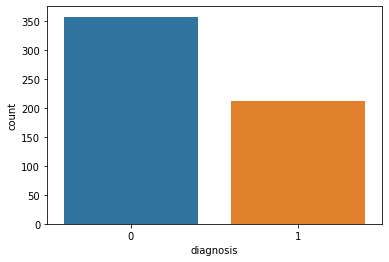

In [18]:
sns.countplot(x = "diagnosis", data = cancer)

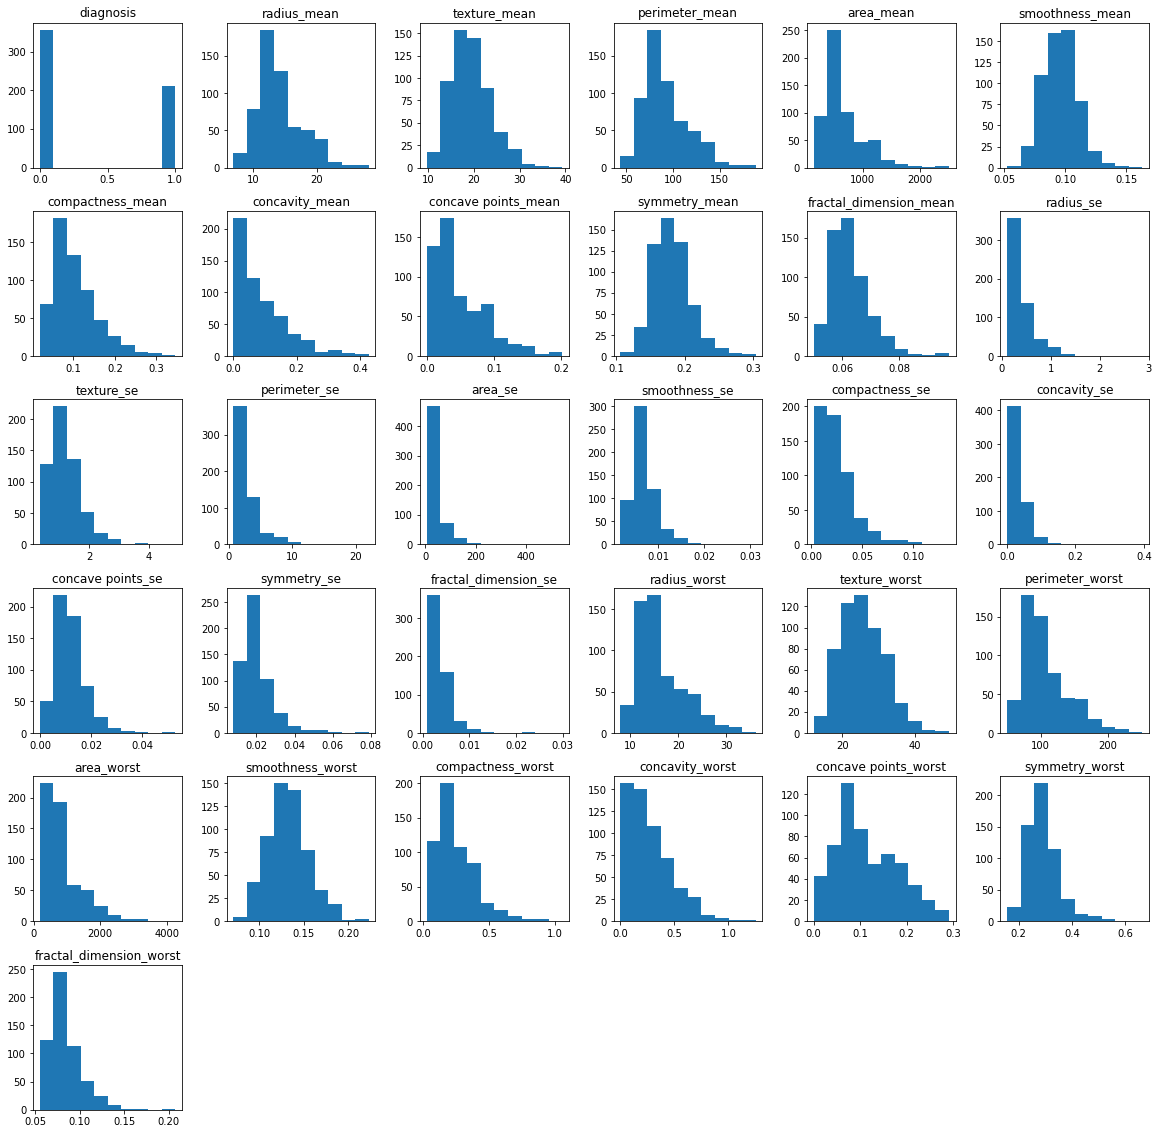

In [19]:
fig = cancer.hist(figsize = (20,20),grid = False)


In [20]:
cancer_mean = cancer.iloc[:,1:11]

In [21]:
cancer_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

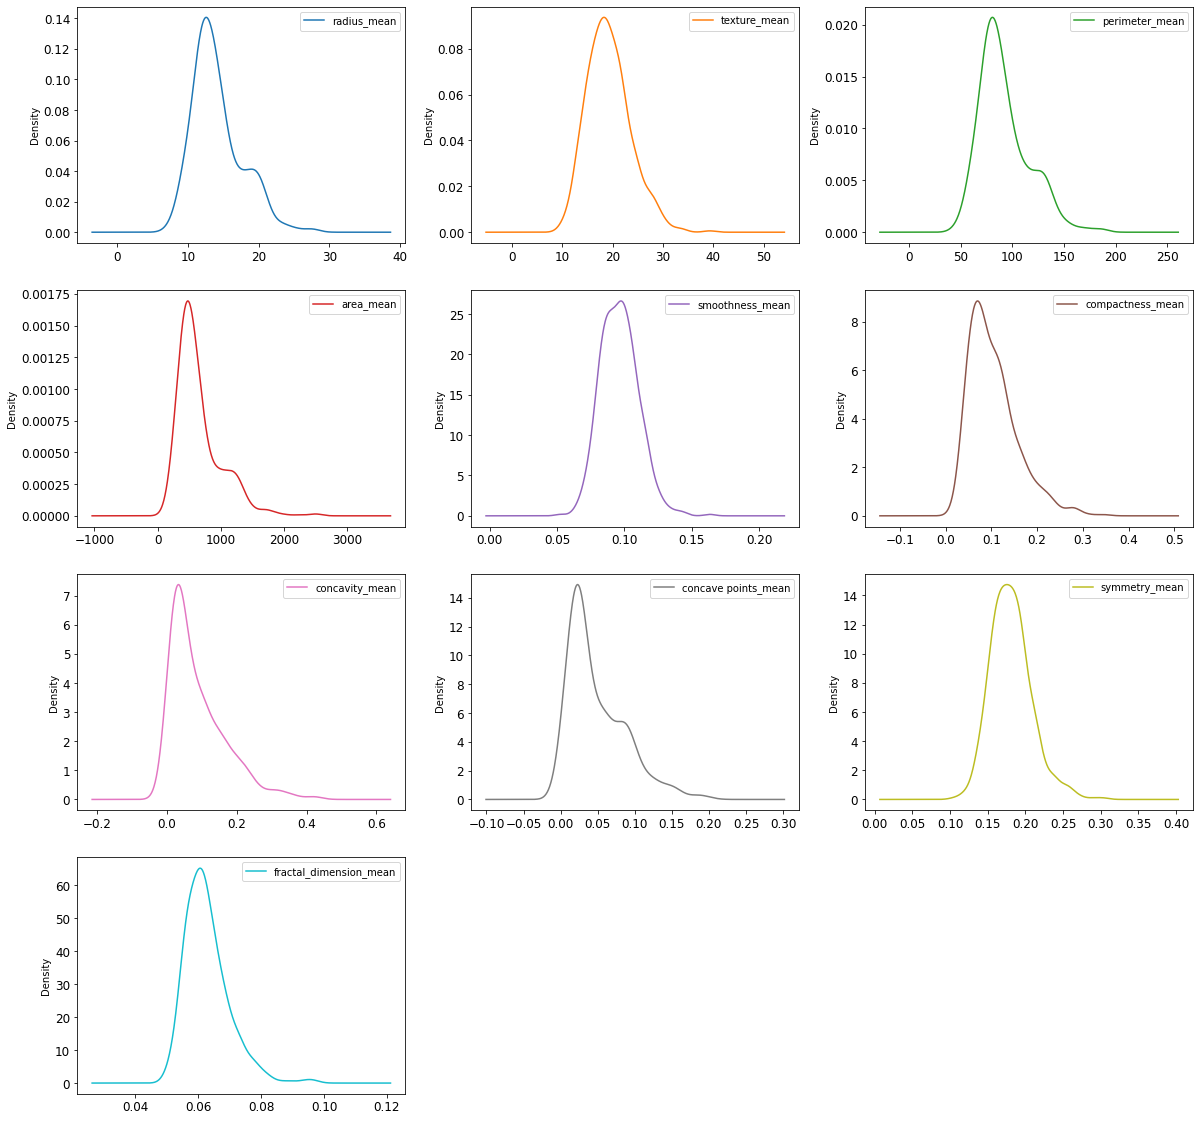

In [22]:
cancer_mean.plot(kind = "density", subplots = True, layout = (4,3), sharex = False, sharey= False, 
                 fontsize = 12, figsize = (20,20))

In [23]:
cancer_se = cancer.iloc[:,11:21]

In [24]:
cancer_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

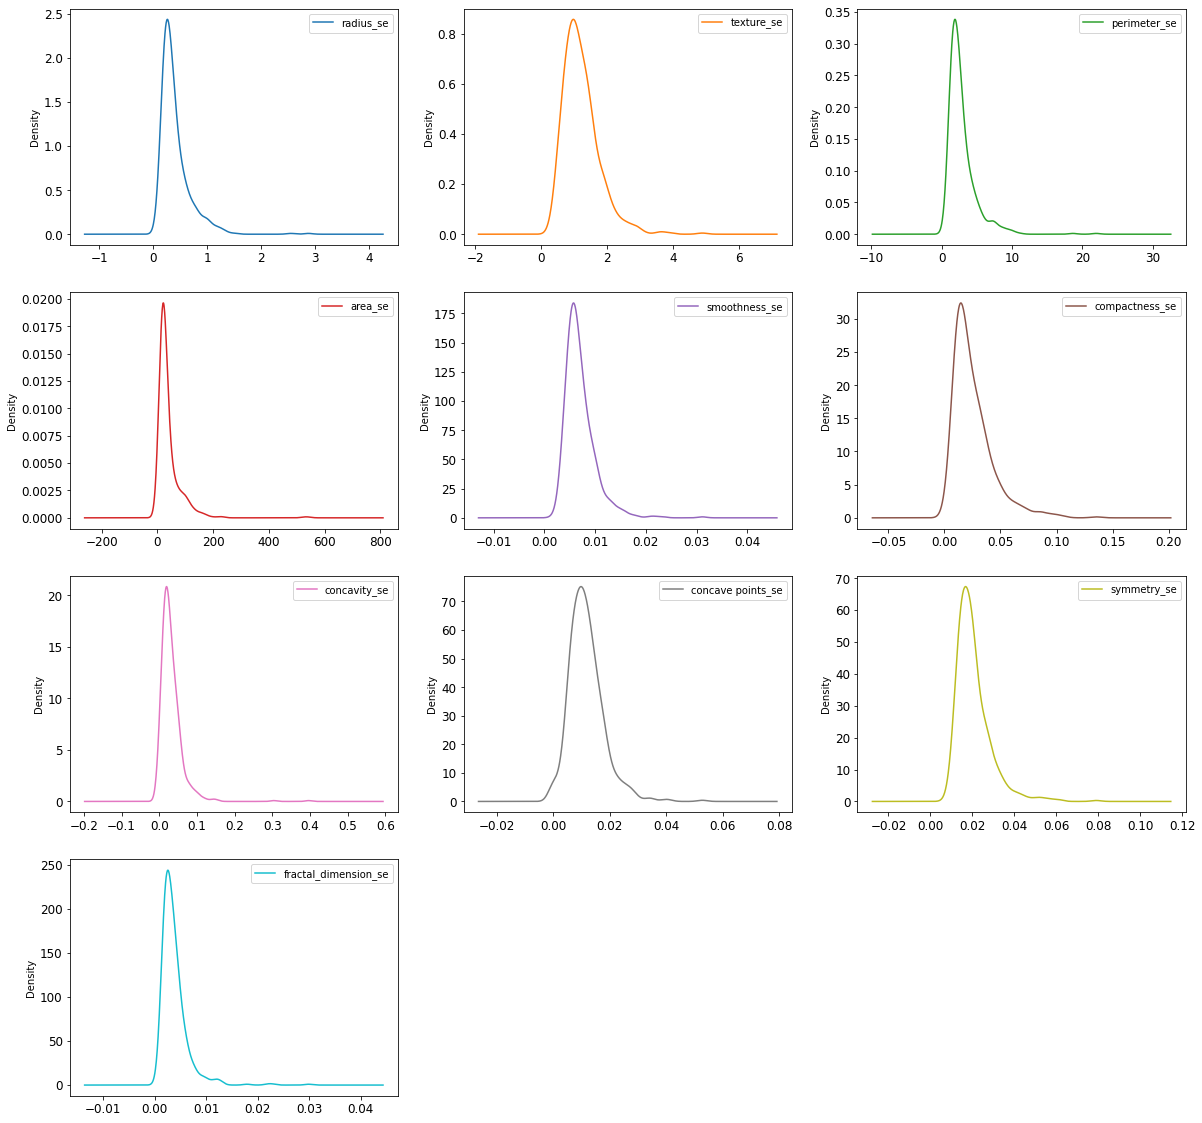

In [18]:
cancer_se.plot(kind = "density", subplots = True, layout = (4,3), 
               sharex = False, sharey= False, fontsize = 12, figsize = (20,20))

In [26]:
cancer_worst = cancer.iloc[:,21:]

In [27]:
cancer_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

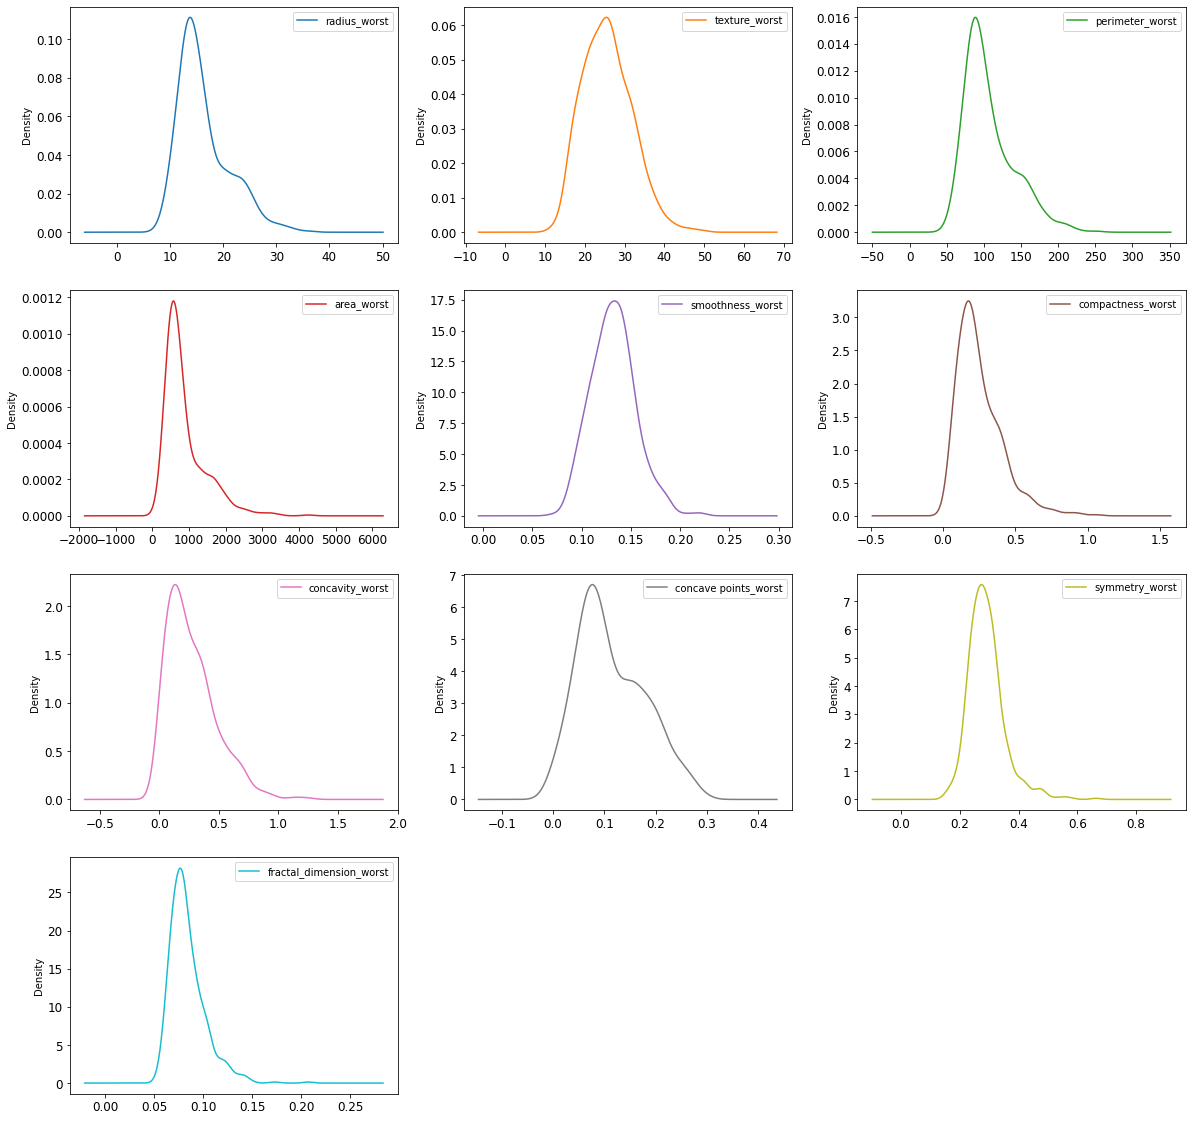

In [28]:
cancer_worst.plot(kind = "density", subplots = True, layout = (4,3), sharex = False, sharey= False, fontsize = 12, figsize = (20,20))

# Correlation

Text(0.5, 1.0, 'CORRELATION MAP')

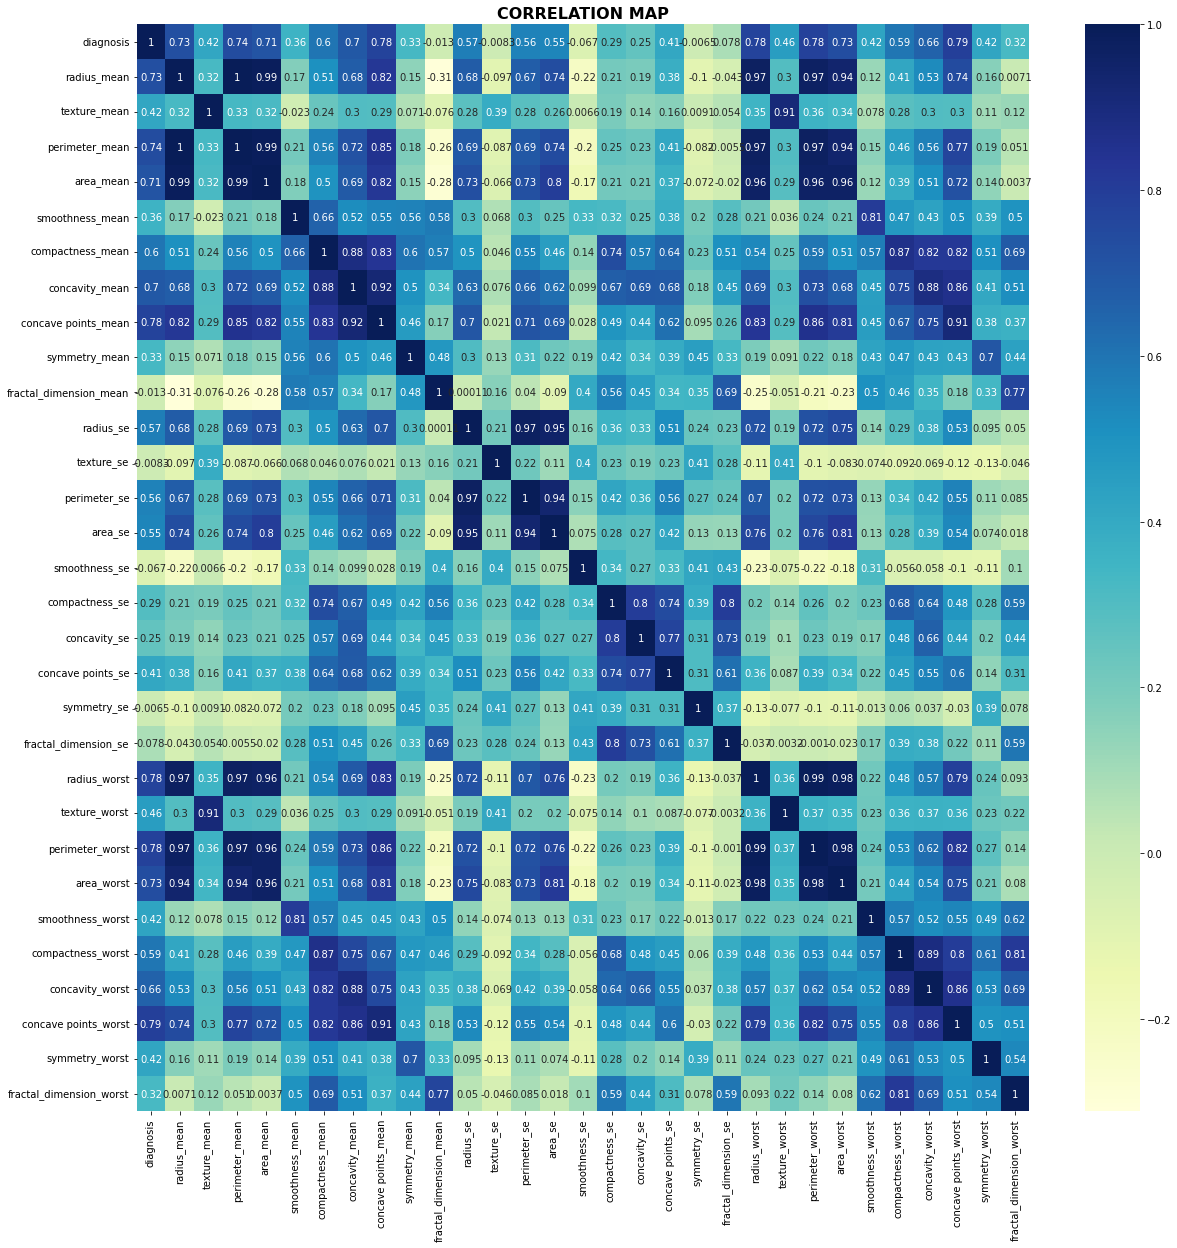

In [29]:
corr = cancer.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cancer.corr(), cmap = 'YlGnBu', annot = True)
plt.title("CORRELATION MAP", fontweight = "bold", fontsize = 16)

In [23]:
corr[abs(corr["diagnosis"])> 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

<AxesSubplot: title={'center': 'Correlation between feature variable and target variable '}>

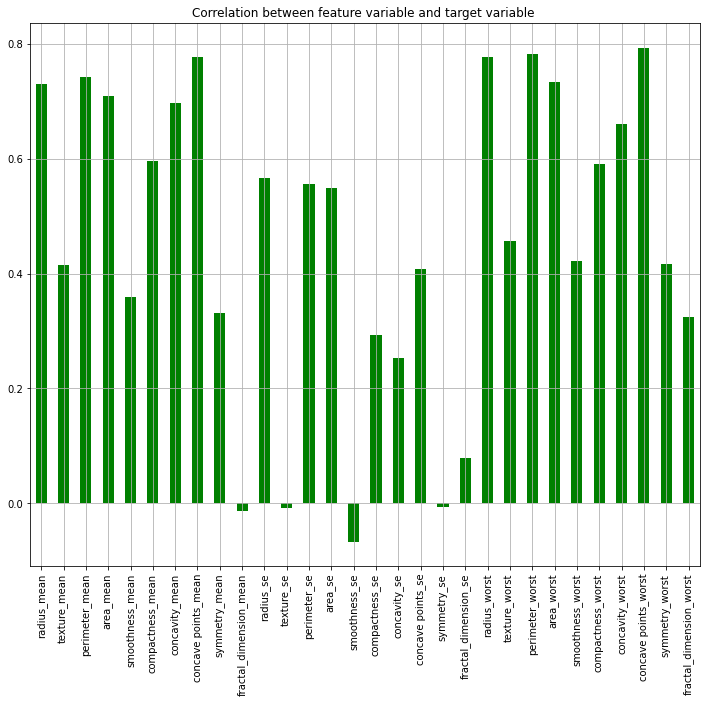

In [32]:
cancer.drop('diagnosis', axis=1).corrwith(cancer.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation between feature variable and target variable ",color="green")

# Splitting Data

In [33]:
x = cancer.drop("diagnosis",axis = 1)
y = cancer.diagnosis

In [34]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [36]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

In [38]:
x_train.shape

(398, 30)

In [39]:
y_train.shape

(398,)

In [40]:
x_test.shape

(171, 30)

In [41]:
y_test.shape

(171,)


# Model Building

# Logistic Regression

In [42]:
def lr_grid_search(x, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(x, y)
    
    return grid_result.best_params_

In [47]:
lr =LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Precision: 0.95
Recall: 0.9047619047619048
0.9623115577889447
0.9473684210526315


In [48]:
lr_tacc = lr.score(x_test,y_test)
lr_train_acc = lr.score(x_train, y_train)

# Confusion Matrix of Logistic Regression Model

<AxesSubplot: >

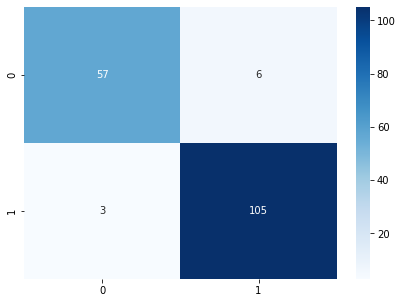

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

lr_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='g',cmap="Blues")

# AUC of Logistic Regression Model

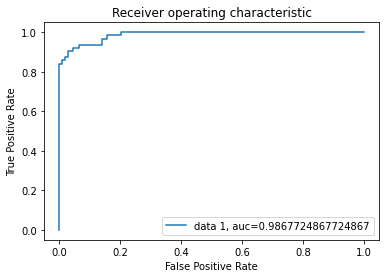

In [51]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [111]:
lr_auc = auc
lr_auc

0.9542915931804821

# DecisionTree

In [132]:
def dtree_grid_search(x, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(x, y)
    
    return dtree_gscv.best_params_

In [131]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

print(classification_report(y_test, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       108
           1       0.81      0.89      0.85        63

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.88       171
weighted avg       0.89      0.88      0.88       171

Accuracy: 0.8830409356725146
Precision: 0.8115942028985508
Recall: 0.8888888888888888


In [130]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9698492462311558
0.9181286549707602


In [129]:
dt_tacc = dt.score(x_test,y_test)

In [128]:
dt_train_acc = dt.score(x_train, y_train)
dt_train_acc

0.9698492462311558

# Confusion Matrix of Decision Tree Model

<AxesSubplot: >

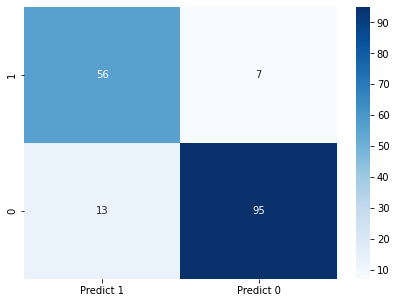

In [127]:
cm = metrics.confusion_matrix(y_test, y_pred1, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

# AUC of Decision Tree Classifier Model

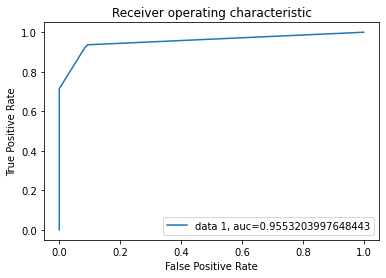

In [125]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [126]:
dt_auc = auc
dt_auc

0.9553203997648443

#  AdaBoosting

In [61]:
def ada_grid_search(x, y):
    #create a dictionary of all values we want to test
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # AdaBoost model
    ada = AdaBoostClassifier()
    
    # Use gridsearch to test all values
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    #fit model to data
    grid_result = ada_gscv.fit(x, y)
    
    return grid_result.best_score_, ada_gscv.best_params_

In [62]:
abcl = AdaBoostClassifier(n_estimators=500, learning_rate=1.0)
abcl = abcl.fit(x_train, y_train)
y_pred4 = abcl.predict(x_test)

print(classification_report(y_test, y_pred4))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Precision: 0.967741935483871
Recall: 0.9523809523809523


In [63]:
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))

1.0
0.9707602339181286


In [64]:
ada_tacc = abcl.score(x_test,y_test)

In [65]:
ada_train_acc = abcl.score(x_train, y_train)

# Confusion Matrix of AdaBoost Model

<AxesSubplot: >

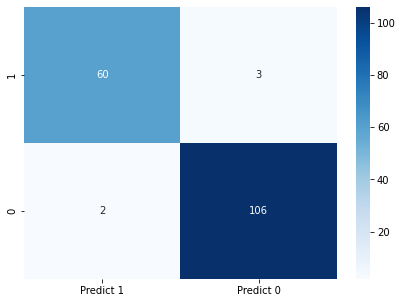

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred4, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

# Confusion Matrix of AdaBoost Model

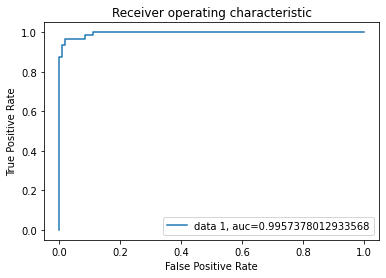

In [67]:
y_pred_proba = abcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [68]:
ada_auc = auc
ada_auc

0.9957378012933568

# RandomForest

In [69]:
def rf_grid_search(x, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(x, y)
    
    return rf_gscv.best_params_

In [70]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_test, y_pred2))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Precision: 0.9354838709677419
Recall: 0.9206349206349206


In [71]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
0.9473684210526315


In [72]:
rf_tacc = rf.score(x_test,y_test)

In [73]:
rf_train_acc = rf.score(x_train, y_train)

# Confusion Matrix of Random Forest Classifier Model

<AxesSubplot: >

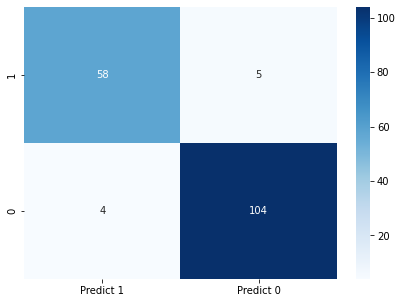

In [74]:
cm = metrics.confusion_matrix(y_test, y_pred2, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

# AUC of Random Forest Classifier

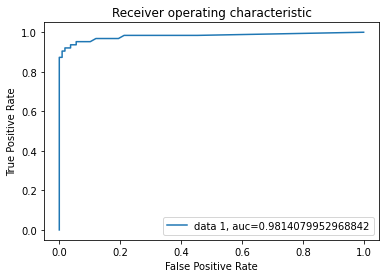

In [75]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [76]:
rf_auc = auc
rf_auc

0.9814079952968842

# XGBoost

In [77]:
def xgb_grid_search(x, y):
    # Create a dictionary of all values we want to test
    param_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    xgb = XGBClassifier()
    
    #use gridsearch to test all values
    xgb_gscv =  RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    xgb_gscv.fit(x, y)
    
    return xgb_gscv.best_params_

In [80]:
xgb = XGBClassifier(min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3)
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))

print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9590643274853801
Precision: 0.9666666666666667
Recall: 0.9206349206349206
1.0
0.9590643274853801


In [81]:
xgb_tacc = xgb.score(x_test,y_test)

In [82]:
xgb_train_acc = xgb.score(x_train, y_train)

# Confusion Matrix of XGBoost Model

<AxesSubplot: >

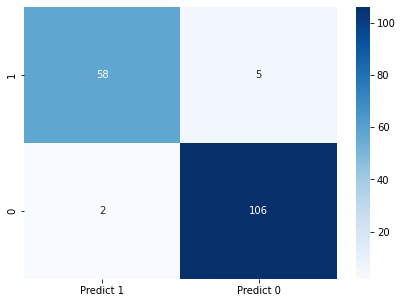

In [83]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

# AUC of XGBoost Model

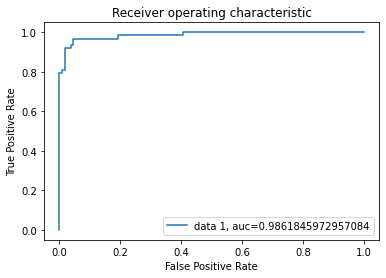

In [84]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [110]:
xgb_auc = auc
xgb_auc

0.9542915931804821

# Support Vector Machine (SVM)

In [86]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = GridSearchCV(estimator = svm,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [87]:
svm = SVC(gamma=0.01, C=10, kernel='rbf', probability=True)

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

1.0
0.6374269005847953


In [88]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       108
           1       1.00      0.02      0.03        63

    accuracy                           0.64       171
   macro avg       0.82      0.51      0.40       171
weighted avg       0.77      0.64      0.50       171



In [89]:
svm_tacc = svm.score(x_test, y_test)

In [90]:
svm_train_acc = svm.score(x_train, y_train)

# Confusion Matrix of SVM

<AxesSubplot: >

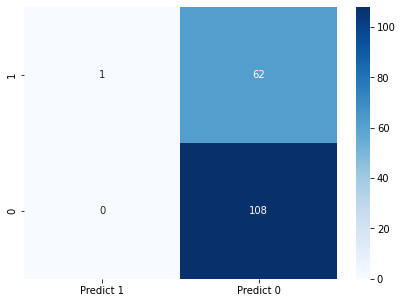

In [97]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

In [92]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

# AUC of SVM

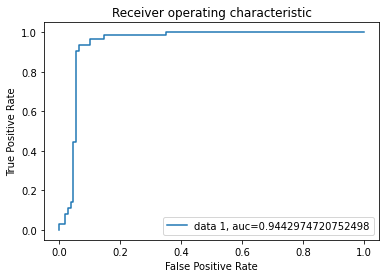

In [95]:
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [100]:
svm_auc = auc
svm_auc

0.9442974720752498

# K-Nearest Neighbor(KNN)

In [101]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    knn = KNeighborsClassifier()
    
    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [102]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.949748743718593
0.8947368421052632


In [103]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       108
           1       0.98      0.73      0.84        63

    accuracy                           0.89       171
   macro avg       0.92      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



In [104]:
knn_tacc = knn.score(x_test, y_test)

In [105]:
knn_train_acc = knn.score(x_train, y_train)

<AxesSubplot: >

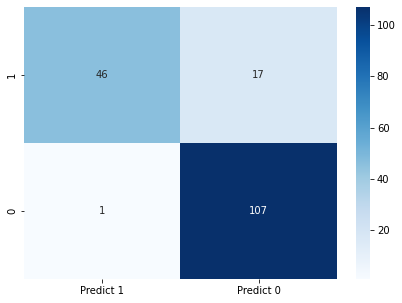

In [106]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")

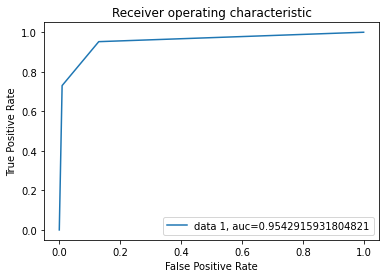

In [107]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [108]:
knn_auc = auc
knn_auc

0.9542915931804821

# Cancer Predicting Accuracy

In [133]:
lr_auc = auc
knn_auc = auc
rf_auc = auc
xgb_auc = auc
dt_auc = auc
ada_auc = auc
svm_auc = auc


print("Logistic Regression Accuracy: ", lr_auc)
print("K-Nearest Neighbor Accuracy: ",knn_auc)
print("Random Forest Accuracy: ",rf_auc)
print("XG Boost Accuracy: ", xgb_auc)
print("DecisionTree Accuracy: ", dt_auc)
print("AdaBoost Accuracy: ",ada_auc)
print("Support Vector Machine Accuracy: ", svm_auc)

Logistic Regression Accuracy:  0.9553203997648443
K-Nearest Neighbor Accuracy:  0.9553203997648443
Random Forest Accuracy:  0.9553203997648443
XG Boost Accuracy:  0.9553203997648443
DecisionTree Accuracy:  0.9553203997648443
AdaBoost Accuracy:  0.9553203997648443
Support Vector Machine Accuracy:  0.9553203997648443
